In [1]:
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder
import numpy as np

In [2]:
df = pd.read_csv(Path('sealevel.csv'))
df.head()


,Year,TotalWeightedObservations,Global Isostatic Adjustment,Standard_Deviation_of_Global_Mean_Sea_Level,SmoothedGSML_noGIA,GMSL_GIA,StdDevGMSL_GIA,SmoothedGSML_GIA,SmoothedGSML_GIA_sigremoved
0,1993,327401.31,-38.59,89.86,-38.76,-38.59,89.86,-38.75,-38.57
1,1993,324498.41,-41.97,90.86,-39.78,-41.97,90.86,-39.77,-39.11
2,1993,333018.19,-41.93,87.27,-39.62,-41.91,87.27,-39.61,-38.58
3,1993,297483.19,-42.67,90.75,-39.67,-42.65,90.74,-39.64,-38.34
4,1993,321635.81,-37.86,90.26,-38.75,-37.83,90.25,-38.72,-37.21


In [3]:
df.dtypes

Year                                             int64
TotalWeightedObservations                      float64
Global Isostatic Adjustment                    float64
Standard_Deviation_of_Global_Mean_Sea_Level    float64
SmoothedGSML_noGIA                             float64
GMSL_GIA                                       float64
StdDevGMSL_GIA                                 float64
SmoothedGSML_GIA                               float64
SmoothedGSML_GIA_sigremoved                    float64
dtype: object

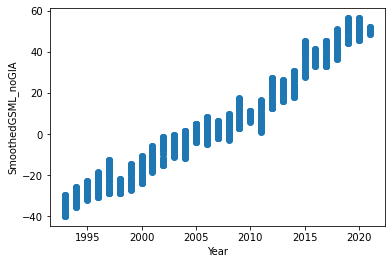

In [4]:
plt.scatter(df.Year, df.SmoothedGSML_noGIA)
plt.xlabel('Year')
plt.ylabel('SmoothedGSML_noGIA')
plt.show()

In [5]:
X = df.Year.values.reshape(-1, 1)

In [6]:
X[:5]

array([[1993],
       [1993],
       [1993],
       [1993],
       [1993]], dtype=int64)

In [7]:
X.shape

(1048, 1)

In [8]:
y = df.SmoothedGSML_noGIA


In [9]:
model = LinearRegression()

In [10]:
model.fit(X, y)

LinearRegression()

In [11]:
y_pred = model.predict(X)
print(y_pred.shape)

(1048,)


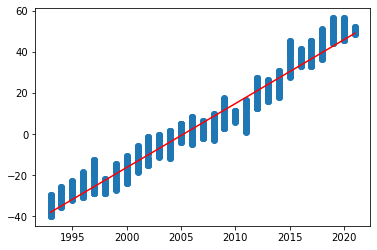

In [12]:
plt.scatter(X, y)
plt.plot(X, y_pred, color='red')
plt.show()

In [13]:
print(model.coef_)
print(model.intercept_)

[3.10787931]
-6232.011072745922


In [14]:
df = pd.read_csv(Path('CO2_Emissions.csv'))
df.head()
print(df.shape)

(235, 27)


In [15]:
df.dtypes

Country Name     object
1993            float64
1994            float64
1995            float64
1996            float64
1997            float64
1998            float64
1999            float64
2000            float64
2001            float64
2002            float64
2003            float64
2004            float64
2005            float64
2006            float64
2007            float64
2008            float64
2009            float64
2010            float64
2011            float64
2012            float64
2013            float64
2014            float64
2015            float64
2016            float64
2017            float64
2018            float64
dtype: object

In [16]:

df[df['1994'].isna()]


,Country Name,1993,1994,1995,1996,1997,1998,1999,2000,2001,...,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018


In [17]:
df.dropna(axis = 0, how = "any")
print (df.shape)

(235, 27)


In [18]:
y= df['2018']
X=df.drop('2018', axis = 1)
X = pd.get_dummies(X, columns=["Country Name"])
print (X.shape)
X.head()

(235, 260)


,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,...,Country Name_Upper middle income,Country Name_Uruguay,Country Name_Uzbekistan,Country Name_Vanuatu,"Country Name_Venezuela, RB",Country Name_Vietnam,Country Name_World,"Country Name_Yemen, Rep.",Country Name_Zambia,Country Name_Zimbabwe
0,0.925465,0.918612,0.946475,0.951132,0.971563,0.969680,0.908374,0.900399,0.971981,0.975749,...,0,0,0,0,0,0,0,0,0,0
1,0.085986,0.076131,0.069020,0.062588,0.056827,0.053197,0.040653,0.037055,0.037488,0.048671,...,0,0,0,0,0,0,0,0,0,0
2,0.518952,0.492858,0.487495,0.507633,0.488416,0.461622,0.453549,0.447244,0.474140,0.474875,...,0,0,0,0,0,0,0,0,0,0
3,0.527723,0.495418,0.773026,0.792321,0.788753,0.740254,0.797259,0.754476,0.761843,0.777423,...,0,0,0,0,0,0,0,0,0,0
4,0.641406,0.667179,0.611710,0.621837,0.470098,0.575350,0.955359,1.026213,1.052228,1.229101,...,0,0,0,0,0,0,0,0,0,0


In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

In [20]:
scaler = StandardScaler().fit(X_train)

In [21]:
model = LinearRegression()

X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [23]:
model.fit(X_train_scaled, y_train)
pred=model.predict(X_test_scaled)